# Statistical Inference for Categorical Data Lab

## Retail Customer Loyalty Marketing Analysis

You're working as a data analyst for a major retail chain that's analyzing their customer loyalty program. The marketing team wants to understand if there are patterns in how customers engage with their promotional campaigns. They've collected data on customer responses to different types of promotions (email, SMS, app notification) and whether customers made a purchase within 7 days of receiving the promotion. Additionally they also recorded the time of day when the promotion was opened/accessed and want to know if promotional engagement varies by the time of day.

The marketing team needs your help to:
- Determine if customers show preferences for when they engage with promotions (morning, afternoon, evening)
- Investigate whether the type of promotion is related to customer purchase behavior

This analysis will help the marketing team optimize their promotional strategy and improve campaign effectiveness.

## Data Overview

Data File: retail_promotions.csv

Contains columns:
- TimeOfDay (Morning, Afternoon, Evening)
- PromotionType (Email, AppNotification, SMS)
- MadePurchase (Yes, No)

First, let's import the libraries you'll need for our analysis and also load in the data

In [1]:
# CodeGrade step0
# Import the required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# You will need to have downloaded the provided data file and placed it the same location as the notebook
df = pd.read_csv('retail_promotions.csv')

### Part 1: Define the Research Question
Before diving into the analysis, it's crucial to clearly articulate our research questions and formal hypotheses. This helps ensure our statistical tests align with our business objectives. We'll use α = 0.05 for our hypothesis tests.

#### Research Question 1: Time Preference Analysis
- Main Question: Do customers show significant preferences for when they engage with promotions?
- Business Context: Understanding timing preferences helps optimize when to send promotions.

Select the appropriate Null and Alternative Hypothesis from the options below and assign the letter (string) to the answer variable.

Consider: What would it mean if customers had no timing preferences?

Option A:
- Null Hypothesis (H₀): There is no preference for time of day
- Alternative Hypothesis (H₁): One of the times has significantly higher frequency

Option B:
- Null Hypothesis (H₀): The observed frequencies are not different than the expected
- Alternative Hypothesis (H₁): The expected frequencies show a significant difference in time of day

Option C:
- Null Hypothesis (H₀): There is no difference in frequency for time of day
- Alternative Hypothesis (H₁): There are significant differences between the expected and the observed time of day frequencies

In [ ]:
# CodeGrade step1
# Assign the string letter ("A", "B", or "C")
time_pref_hyp = 'B'

#### Research Question 2: Promotion Type Effectiveness
- Main Question: Is there a relationship between promotion type and purchase behavior?
- Business Context: Identifying the most effective promotion type can improve campaign ROI.

WSelect the appropriate Null and Alternative Hypothesis from the options below and assign the letter (string) to the answer variable.

Consider: What would it mean if promotion type and purchase behavior were independent?

Option A:
- Null Hypothesis (H₀): The promotion type has no effect on customer purchase behavior
- Alternative Hypothesis (H₁): There are differences in customer purchase behavior based on promotion type

Option B:
- Null Hypothesis (H₀): Customer purchase behavior is dependant on the type of promotion
- Alternative Hypothesis (H₁): Customer purchase behavior is independant on the type of promotion

Option C:
- Null Hypothesis (H₀): Customer purchase behavior and promotion type are not related
- Alternative Hypothesis (H₁): The frequency of customer purchases is the same across promotion types

In [ ]:
# CodeGrade step2
# Assign the string letter ("A", "B", or "C")
promotion_hyp = 'A'

### Part 2: Data Exploration

Before diving into statistical tests, we need to understand the structure and quality of our data through exploratory analysis and visualization. This critical step helps us identify any potential data quality issues and gives us an initial sense of patterns that might exist in customer behavior.

#### General Statistics:

In [14]:
# CodeGrade step3
# Extract basic information and summary of the data using pandas
df.info()
print(df.columns)
print(df.dtypes)
print(df['TimeOfDay'].unique())
print(df['PromotionType'].unique())
print(df['MadePurchase'].unique())
print(df.isnull().sum())

# Number of each promotion type: use built-in pandas method value_counts()
promotion_counts = df['PromotionType'].value_counts()
print(promotion_counts)

# Basic summary statistics using pandas
df_describe = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TimeOfDay      3500 non-null   object
 1   PromotionType  3500 non-null   object
 2   MadePurchase   3500 non-null   object
dtypes: object(3)
memory usage: 82.2+ KB
Index(['TimeOfDay', 'PromotionType', 'MadePurchase'], dtype='object')
TimeOfDay        object
PromotionType    object
MadePurchase     object
dtype: object
['Morning' 'Evening' 'Afternoon']
['Email' 'AppNotification' 'SMS']
['Yes' 'No']
TimeOfDay        0
PromotionType    0
MadePurchase     0
dtype: int64
PromotionType
Email              1799
SMS                 993
AppNotification     708
Name: count, dtype: int64


In [15]:
# Run this cell without changes
print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nSummary statistics:")
print(df_describe)

First few rows of the dataset:
   TimeOfDay    PromotionType MadePurchase
0    Morning            Email          Yes
1    Evening  AppNotification          Yes
2  Afternoon  AppNotification           No
3  Afternoon            Email           No
4    Morning  AppNotification           No

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TimeOfDay      3500 non-null   object
 1   PromotionType  3500 non-null   object
 2   MadePurchase   3500 non-null   object
dtypes: object(3)
memory usage: 82.2+ KB
None

Summary statistics:
       TimeOfDay PromotionType MadePurchase
count       3500          3500         3500
unique         3             3            2
top      Morning         Email           No
freq        1906          1799         2654


#### Visualize Distributions:

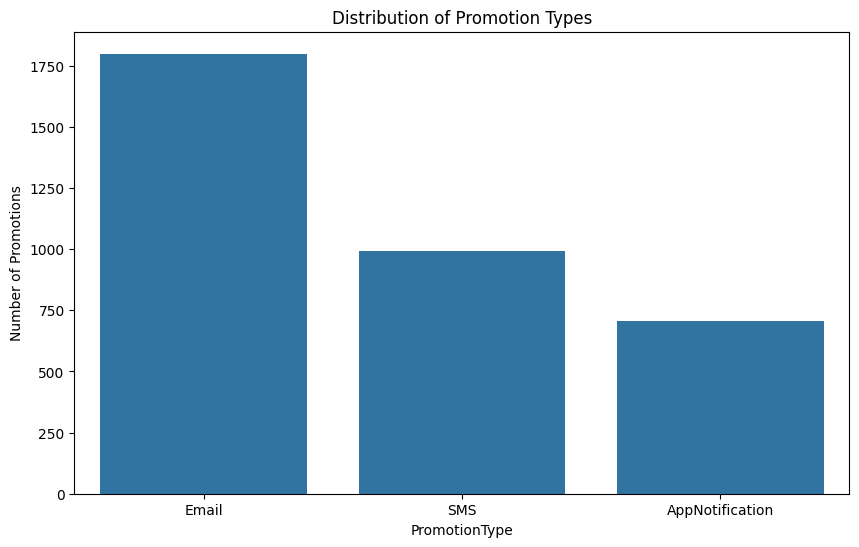

In [16]:
# CodeGrade step4
# Promotion Type Distribution
plt.figure(figsize=(10, 6))

# Set x and y - use promotion_counts object
x = promotion_counts.index
y = promotion_counts.values

# Create Seaborn barplot
barplot = sns.barplot(x=x, y=y)

# Labels
plt.title('Distribution of Promotion Types')
plt.ylabel('Number of Promotions')
plt.show()

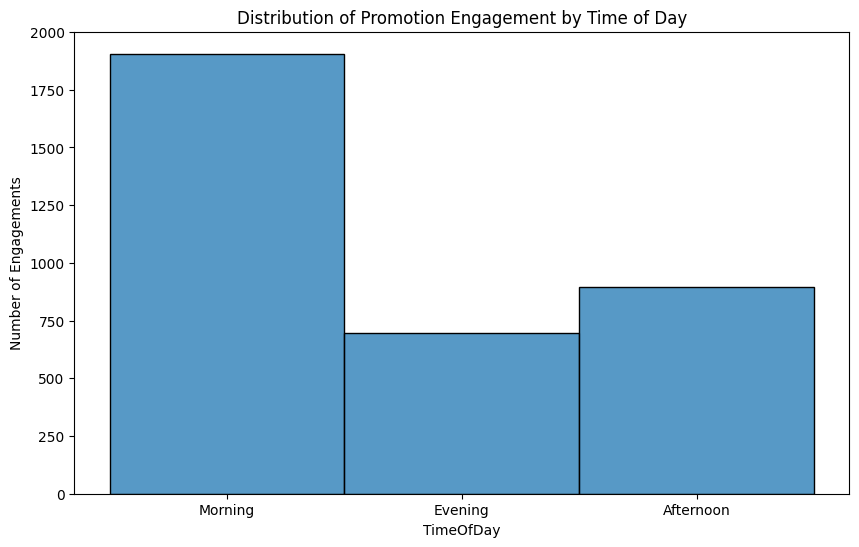

In [17]:
# CodeGrade step5
# Time of Day Distribution
plt.figure(figsize=(10, 6))

# Create Seaborn histplot - alternate way to barplot
histplot = sns.histplot(data=df, x='TimeOfDay')

# Labels
plt.title('Distribution of Promotion Engagement by Time of Day')
plt.ylabel('Number of Engagements')
plt.show()

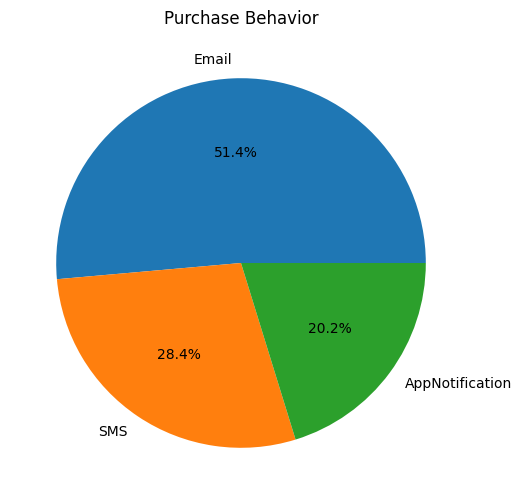

In [18]:
# CodeGrade step6
# Purchase Behavior Distribution
plt.figure(figsize=(10, 6))

# Set counts and labels
x = promotion_counts.values
labels = promotion_counts.index

# Create Matplotlib pie chart - another way - low catergory numbers
pie = plt.pie(x=x, labels=labels, autopct='%1.1f%%')

# Labels
plt.title("Purchase Behavior")
plt.show()

### Part 3: Goodness of Fit Test for Time Preferences

Now you can examine whether customers show significant preferences for when they engage with promotions using a chi-square goodness of fit test. This analysis will help the marketing team determine if they should prioritize specific times of day for sending promotional messages.

Scipy documentation for [chisquare GoF Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)

In [23]:
# CodeGrade step7
# Calculate observed frequencies
observed_time_freq = df['TimeOfDay'].value_counts().sort_index()
total_observations = observed_time_freq.sum()

# Calculate expected frequencies (assuming uniform distribution - no preference)
expected_time_freq = np.array([1/3, 1/3, 1/3]) * total_observations

# Perform chi-square goodness of fit test
time_chi2_stat, time_p_value = stats.chisquare(f_obs = observed_time_freq, f_exp = expected_time_freq)


Chi-square Goodness of Fit Test Results for Time Preferences:
Chi-square statistic: 719.59
p-value: 0.0000


<Figure size 1000x600 with 0 Axes>

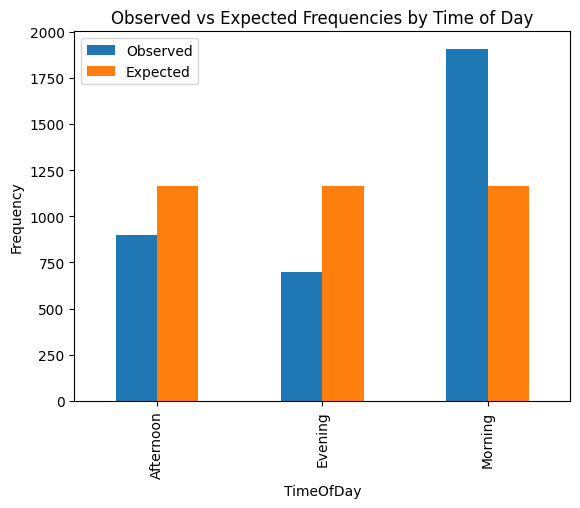

In [24]:
# Run this code without changes to display results
print("\nChi-square Goodness of Fit Test Results for Time Preferences:")
print(f"Chi-square statistic: {time_chi2_stat:.2f}")
print(f"p-value: {time_p_value:.4f}")

# Visualize observed vs expected frequencies
plt.figure(figsize=(10, 6))
time_comparison = pd.DataFrame({
    'Observed': observed_time_freq,
    'Expected': expected_time_freq
}, index=observed_time_freq.index)
time_comparison.plot(kind='bar')
plt.title('Observed vs Expected Frequencies by Time of Day')
plt.ylabel('Frequency')
plt.show()


### Part 4: Test of Independence for Promotion Type

In this step, you investigate whether the type of promotion (email, SMS, or app notification) influences customer purchase behavior. Using a chi-square test of independence, you'll determine if certain promotional channels are more effective at driving purchases, which could significantly impact the marketing team's channel strategy.

Scipy documentation for [chi2_contingency Test of Independence](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

In [32]:
# CodeGrade step8
# Create contingency table - use pandas crosstab
contingency_table = pd.crosstab(df['PromotionType'], df['MadePurchase'])
print(contingency_table)
# Calculate purchase rates
purchase_rate_emails = contingency_table.loc['Email','Yes'] / contingency_table.loc['Email'].sum()
purchase_rate_sms = contingency_table.loc['SMS', 'Yes'] / contingency_table.loc['SMS'].sum()
purchase_rate_app = contingency_table.loc['AppNotification', 'Yes'] / contingency_table.loc['AppNotification'].sum()

# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

MadePurchase       No  Yes
PromotionType             
AppNotification   453  255
Email            1445  354
SMS               756  237



Contingency Table:
MadePurchase       No  Yes
PromotionType             
AppNotification   453  255
Email            1445  354
SMS               756  237

Chi-square Test of Independence Results:
Chi-square statistic: 74.07
p-value: 0.0000
Degrees of freedom: 2


<ipython-input-33-9381cd7cac8a>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Made Purchase')


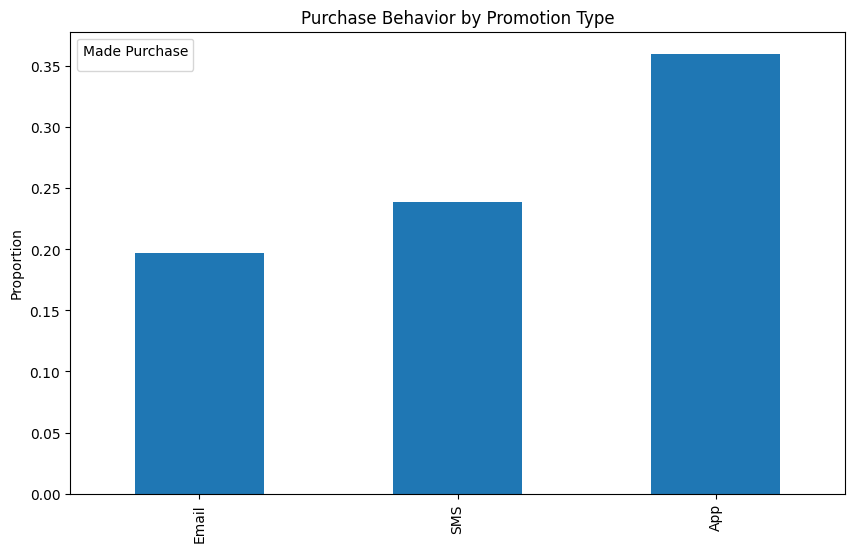

In [33]:
# Run this cell without changes to display results
print("\nContingency Table:")
print(contingency_table)
print("\nChi-square Test of Independence Results:")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

# Visualize relationship between promotion type and purchase behavior
plt.figure(figsize=(10, 6))
purchase_rates = pd.Series([purchase_rate_emails, purchase_rate_sms, purchase_rate_app], index=['Email', 'SMS', 'App'])
purchase_rates.plot(kind='bar', stacked=True)
plt.title('Purchase Behavior by Promotion Type')
plt.ylabel('Proportion')
plt.legend(title='Made Purchase')
plt.show()

### Part 5: Results Interpretation and Recommendations

Finally, we synthesize our statistical findings into actionable business recommendations for the marketing team. This crucial step bridges the gap between statistical significance and business impact, translating our analytical insights into concrete strategies for improving promotional effectiveness.

For each business question interpret the statistical result (reject or fail to reject null hypothesis) and use the visuals above to determine specific patterns.

In [ ]:
# CodeGrade step9
# Time of Day Preferences - Do you reject null? (True or False)
reject_null_time = True
# Assign string ("Morning", "Afternoon", "Evening")
best_time = 'Morning'

# Promotion Type (assign True or False)
reject_null_promo = True
# Assign string ("App", "Email", "SMS")
best_promo = 'App'